# Google Playstore Data Analysis Project

In [1]:
# loading packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

dataset=pd.read_csv("googleplaystore.csv")
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
column=dataset.columns
column

len(column)

13

In [4]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max   

In [5]:
# step 2: Data Cleaning

#1) convert data types for better analysis

print(dataset.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
dataset['Installs']=dataset['Installs'].astype(str).str.replace("Free","0")

dataset['Installs']=dataset['Installs'].str.replace(r"[+,]", "",regex=True).astype(float)


dataset['Price']=pd.to_numeric(dataset['Price'], errors="coerce")

dataset['Last Updated']=pd.to_datetime(dataset['Last Updated'], errors='coerce')

In [7]:
print(dataset.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


In [8]:
# Handling Misssing Values
# 1) Indentifying null columns

dataset.isna().sum()  # count missing data

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
dataset['Rating']=dataset['Rating'].fillna(dataset['Rating'].median())

dataset['Price'].fillna(dataset['Price'].median(), inplace=True)

dataset['Current Ver']=dataset['Current Ver'].fillna(dataset['Current Ver'].mode()[0])

dataset['Android Ver']=dataset['Android Ver'].fillna(dataset['Android Ver'].mode()[0])

dataset['Content Rating']=dataset['Content Rating'].fillna(dataset['Content Rating'].mode()[0])

dataset['Type']=dataset['Type'].fillna(dataset['Type'].mode()[0])

dataset['Last Updated']=dataset['Last Updated'].fillna(dataset['Last Updated'].mode()[0])


In [10]:
# Identifying and removing Duplicates

dataset.duplicated().sum()    # gives number of duplicates

483

In [11]:
dataset.drop_duplicates(keep='first', inplace=True)    ## Removed all duplicates

In [12]:
# Detect Outliers and Remove Them
dataset.describe()


,Rating,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,10358.000000,10358
mean,4.205165,1.415639e+07,1.030701,2017-11-14 10:01:41.486773504
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,19.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.506868,8.023580e+07,16.277843,NaN


C:\Users\kotes\AppData\Local\Temp\ipykernel_21488\3004117811.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rating'])


<Axes: >

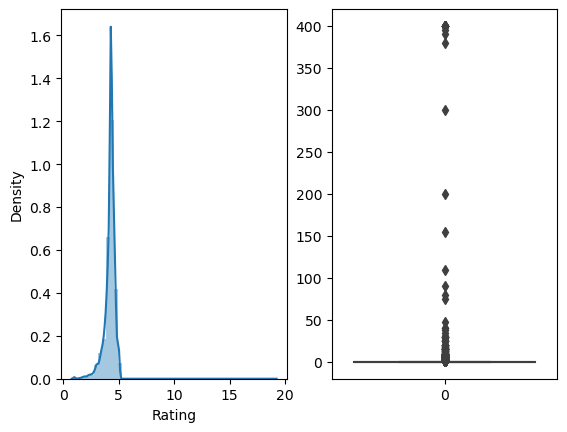

In [13]:
plt.subplot(1,2,1)
sns.distplot(dataset['Rating'])
plt.subplot(1,2,2)
sns.boxplot(dataset['Price'])

<Axes: >

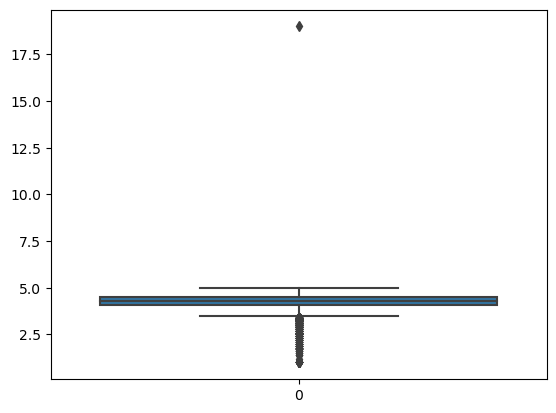

In [14]:
sns.boxplot(dataset['Rating'])

<Axes: >

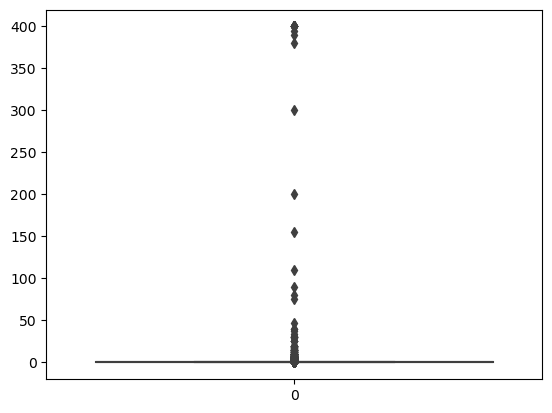

In [15]:
sns.boxplot(dataset['Price'])

In [16]:
# Saving the changes of all as backup
dataset_backup=dataset.copy()

# Handling Outliers

In [17]:
(dataset['Rating']>5).sum()

1

In [20]:
dataset=dataset[dataset['Rating'] <=5]
dataset['Rating'].describe()

count    10357.000000
mean         4.203737
std          0.485594
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

C:\Users\kotes\AppData\Local\Temp\ipykernel_21488\3074010019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rating'])


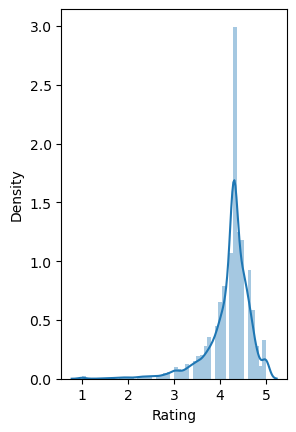

In [22]:
plt.subplot(1,2,1)
sns.distplot(dataset['Rating']) #checking after removing outliers
plt.show()

In [24]:
dataset['Rating'].describe()

count    10357.000000
mean         4.203737
std          0.485594
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

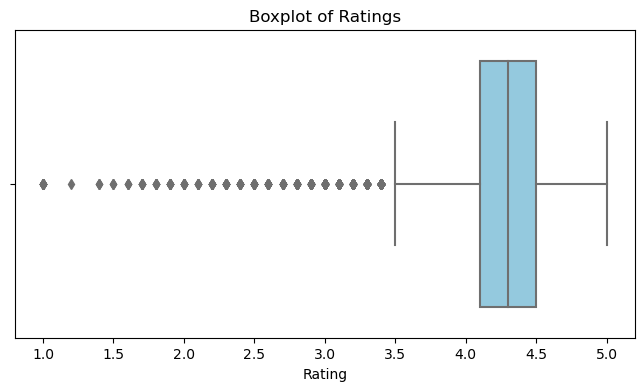

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['Rating'],color='skyblue')
plt.title("Boxplot of Ratings")
plt.show()

# Now understand the Price column for outlier detection

In [28]:
dataset['Price'].describe()

count    10357.000000
mean         1.030800
std         16.278625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [31]:
# Capping Outliers using Percentile

upper_cap = dataset['Price'].quantile(0.95)   # set upper limit at 95th percentile

dataset['Price']= dataset['Price'].clip(upper = upper_cap) # Cap values above 95th percentile
dataset['Price'].describe()

count    10357.000000
mean         0.129848
std          0.472514
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.990000
Name: Price, dtype: float64

# Business Questions for Analysis

# 1. Univariate Analysis (Non-Graphical)

# Q1): What is the Average rating of Apps on the Play Store ?

In [35]:
avg_rating = dataset['Rating'].mean()

print(f"The average rating of apps on the play store is {avg_rating:.2f}")

The average rating of apps on the play store is 4.20


# What percentage of Apps and free and paid ?

In [41]:
free_app_count = dataset[dataset['Type'] == "Free"].shape[0]
paid_app_count = dataset[dataset['Type'] == "Paid"].shape[0]
total_app_count = dataset.shape[0]

free_app_percent = (free_app_count / total_app_count) * 100
paid_app_percent = (paid_app_count / total_app_count) * 100

print(f"Free apps make up {free_app_percent:.2f}% of the apps on the Play Store.")
print(f"Paid apps make up {paid_app_percent:.2f}% of the apps on the Play Store.")


Free apps make up 92.61% of the apps on the Play Store.
Paid apps make up 7.39% of the apps on the Play Store.


# Q3): What is the most common app category ?

In [47]:
most_common_category = dataset['Category'].value_counts().idxmax()
print(f"The most common category is : {most_common_category}")

The most common category is : FAMILY


# 2. Univariate Visualizations (Categorical Variables)

# Q4): Which app category has the highest number of apps ?

Text(0, 0.5, 'App Count')

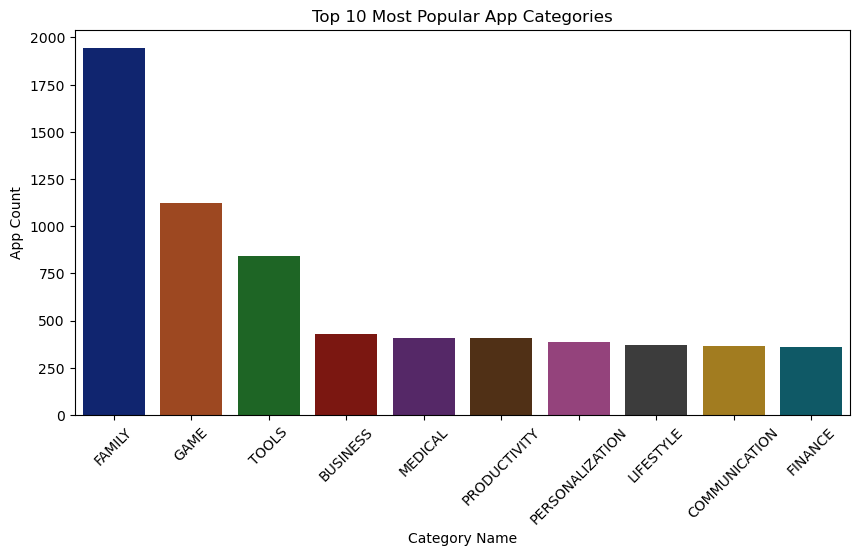

In [57]:
top_categories = dataset['Category'].value_counts().head(10)
top_categories

plt.figure(figsize = (10,5))
sns.barplot(x= top_categories.index , y= top_categories.values, palette ="dark")
plt.xticks(rotation = 45)
plt.title("Top 10 Most Popular App Categories")
plt.xlabel('Category Name')
plt.ylabel("App Count")

# Q5): What is the distribution of Content ratings ?

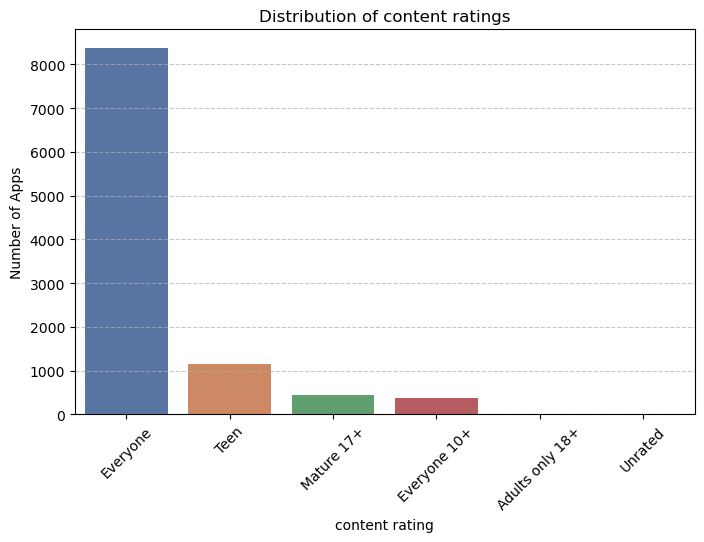

In [63]:
content_rating_counts = dataset["Content Rating"].value_counts()
plt.figure(figsize = (8,5))
sns.barplot(x= content_rating_counts.index , y=content_rating_counts.values, palette='deep')
plt.xticks(rotation = 45)
plt.title("Distribution of content ratings")
plt.xlabel('content rating')
plt.ylabel('Number of Apps')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

# 3. Univariate Visualizations (Numerical Variables)

# Q6): What is the most common rating given to apps ?

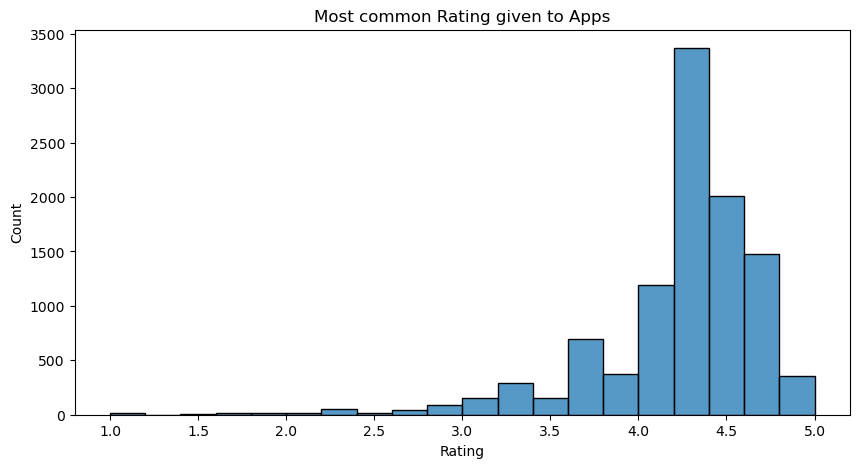

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['Rating'],bins=20)
plt.title("Most common Rating given to Apps")
plt.show()

# Q7): How are app prices distributed ?

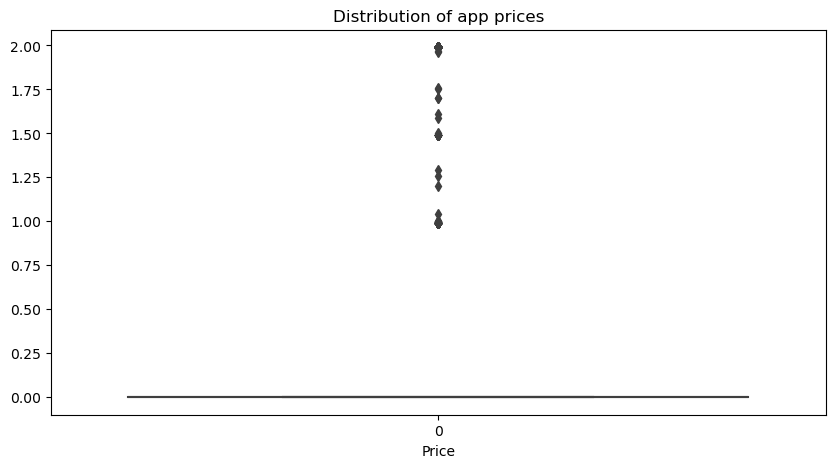

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset['Price'])
plt.title("Distribution of app prices")
plt.xlabel("Price")
plt.show()

# 4. Bivariate Analysis (Numerical vs Categorical)

# Q8): Do free apps have better ratings than paid apps ?

In [69]:
free_app_rating = dataset[dataset['Type'] == "Free"]["Rating"].mean()
paid_app_rating = dataset[dataset['Type'] == "Paid"]["Rating"].mean()

print(f"Average Rating (Free Apps): {free_app_rating:.2f}")
print(f"Average Rating (Paid Apps): {paid_app_rating:.2f}")

Average Rating (Free Apps): 4.20
Average Rating (Paid Apps): 4.27


# Q9): Which app categories have the highest average ratings ?

In [71]:
category_avg_rating= dataset.groupby("Category")["Rating"].mean().sort_values(ascending=False)

print(category_avg_rating.head(10))  # The highest-rated categories are "Events" and "Education".

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64


# 5. Bivariate Visualizations (Numerical vs Numerical)

# Q10): Does a higher number of installs correlate with higher ratings ?

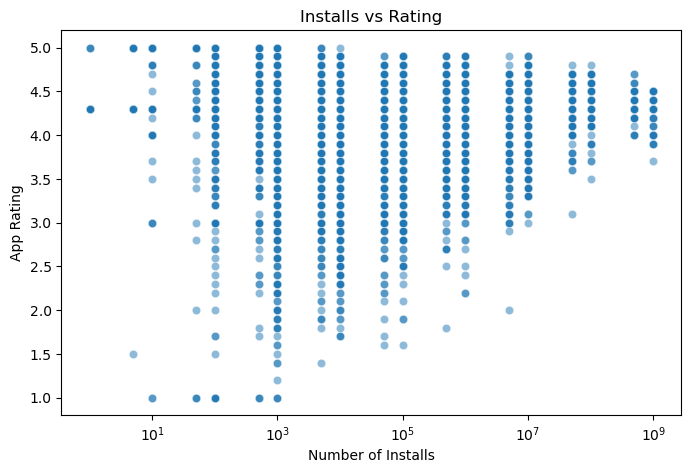

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Installs"], y= dataset["Rating"], alpha=0.5)
plt.xscale('log')
plt.title("Installs vs Rating")
plt.xlabel("Number of Installs")
plt.ylabel("App Rating")
plt.show()   # No Strong Correlation between installs and ratings.

# Q11): Do paid apps generate more installs than free apps ? 

In [78]:
free_installs = dataset[dataset['Type'] == 'Free']["Installs"].mean()
paid_installs = dataset[dataset['Type'] == 'Paid']["Installs"].mean()

print(f"Average Installs (Free Apps): {free_installs:.2f}")
print(f"Average Installs (Paid Apps): {paid_installs:.2f}")

Average Installs (Free Apps): 15279679.80
Average Installs (Paid Apps): 90491.35


# Q12) Are expensive apps rated higher than free apps ?

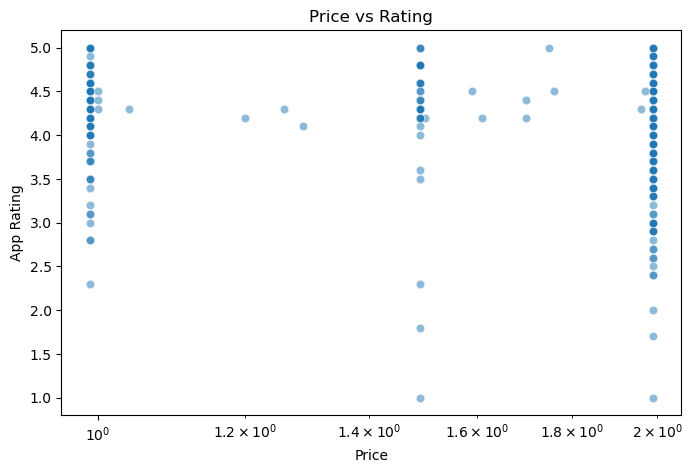

In [81]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Price"],y= dataset["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("App Rating")
plt.show()

# 6. Bivariate Visualizations (Categorical vs Categorical)

# Q13): Which categories have the most paid apps ? 

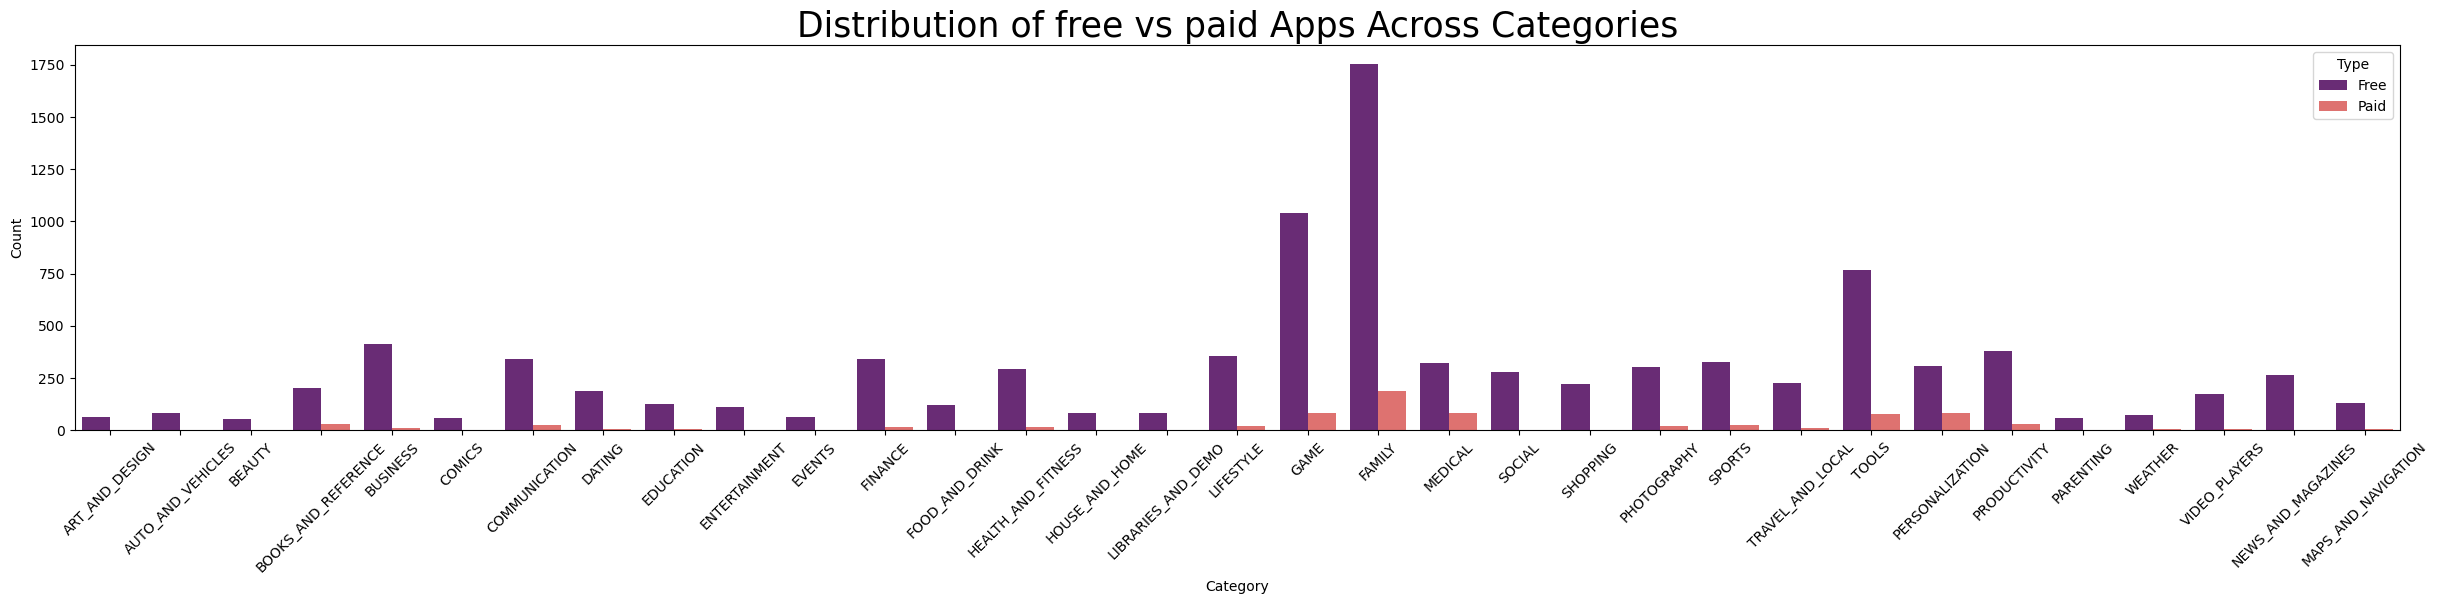

In [82]:
plt.figure(figsize=(30,5))
sns.countplot(x="Category", hue='Type', data = dataset, palette = "magma")
plt.xticks(rotation=45)
plt.title("Distribution of free vs paid Apps Across Categories", fontsize=25)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
